In [28]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Description:

    age
    sex ------------------------------------ (1 = male; 0 = female)
    chest pain type (4 values)
    resting blood pressure
    serum cholestoral in mg/dl
    fasting blood sugar > 120 mg/dl --------------------------- (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
    resting electrocardiographic results (values 0,1,2)
    maximum heart rate achieved
    exercise induced angina ---------------------------------------(1 = yes; 0 = no)
    oldpeak = ST depression induced by exercise relative to rest
    the slope of the peak exercise ST segment
    number of major vessels (0-3) colored by flourosopy
    thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [3]:
df = pd.read_csv('heart.csv')
df.sample(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum() # no null value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
for i in df.columns:
    print(i, df[i].unique())
    print("------------------------------------")

age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
------------------------------------
sex [1 0]
------------------------------------
cp [3 2 1 0]
------------------------------------
trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
------------------------------------
chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 18

In [7]:
   
observation1= '''

age :
    mean = 54
    max = 77
    min = 29
resting blood pressure:
    mean = 132
    max = 200
    min = 94
serum cholestoral in mg/dl:
    mean = 246
    max = 564
    min = 126
fasting blood sugar > 120 mg/dl: categorical
resting electrocardiographic results (values 0,1,2):categorical
maximum heart rate achieved:
    mean = 150
    max = 202
    min = 71
exercise induced angina: Categorical
oldpeak = ST depression induced by exercise relative to rest:
    mean = 1
    max = 6.2
    min = 0
the slope of the peak exercise ST segment: Categorical
number of major vessels (0-3) colored by flourosopy :Categorical
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect : Categorical

'''
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.dtypes # all the data are in int

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
#  1 = male and 0 = female
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.groupby('sex').describe().T)
    
observation2= '''

age :
    Female:
        mean = 56
        max = 76
        min = 24
    Male:
        mean = 54
        max = 77
        min = 29
resting blood pressure:
    Female:
        mean = 133
        max = 200
        min = 94
    Male:
        mean = 130
        max =  194
        min =  94
serum cholestoral in mg/dl:
    Female:
        mean = 261
        max = 564
        min = 141
    Male:
        mean = 239
        max = 353
        min = 126
fasting blood sugar > 120 mg/dl: categorical
resting electrocardiographic results (values 0,1,2):categorical
maximum heart rate achieved:
    Female:
        mean = 151
        max = 192
        min = 96
    Male:
        mean = 149
        max = 207
        min = 71
exercise induced angina: Categorical
oldpeak = ST depression induced by exercise relative to rest:
    Female:
        mean = 0.9
        max = 6.2
        min = 0
    Male:
        mean = 1
        max = 5.6
        min = 0
the slope of the peak exercise ST segment: Categorical
number of major vessels (0-3) colored by flourosopy :Categorical
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect : Categorical

'''
    

sex                      0           1
age      count   96.000000  207.000000
         mean    55.677083   53.758454
         std      9.409396    8.883803
         min     34.000000   29.000000
         25%     49.750000   47.000000
         50%     57.000000   54.000000
         75%     63.000000   59.500000
         max     76.000000   77.000000
cp       count   96.000000  207.000000
         mean     1.041667    0.932367
         std      0.972427    1.059064
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      1.000000    0.000000
         75%      2.000000    2.000000
         max      3.000000    3.000000
trestbps count   96.000000  207.000000
         mean   133.083333  130.946860
         std     19.311119   16.658246
         min     94.000000   94.000000
         25%    120.000000  120.000000
         50%    131.000000  130.000000
         75%    140.000000  140.000000
         max    200.000000  192.000000
chol     count   96.00000

#### EDA

<Figure size 1080x432 with 0 Axes>

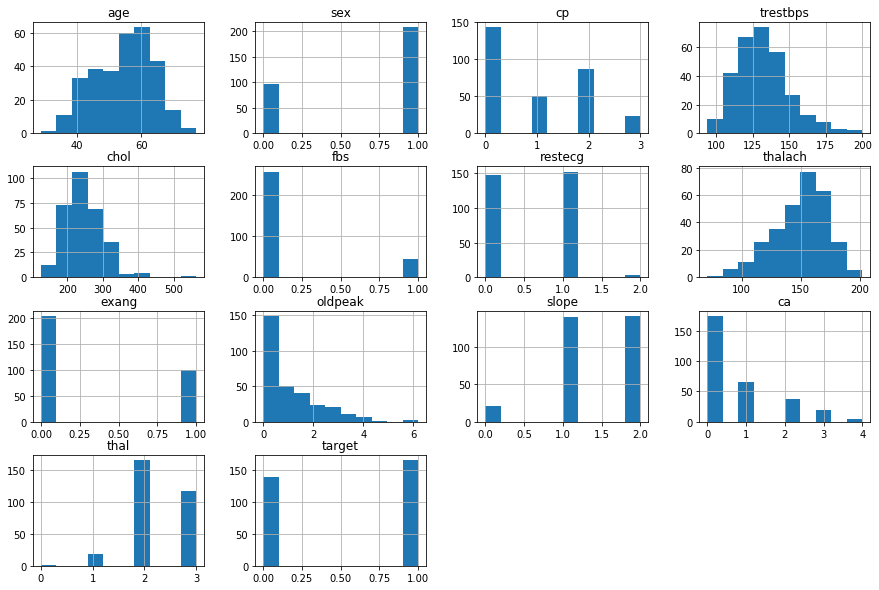

<Figure size 1080x432 with 0 Axes>

In [10]:
df.hist(figsize=(15,10))
plt.figure(figsize=(15,6))

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

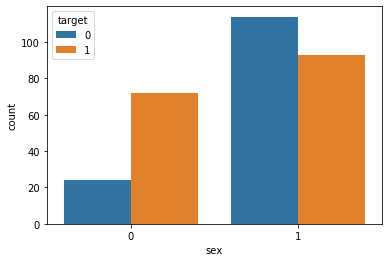

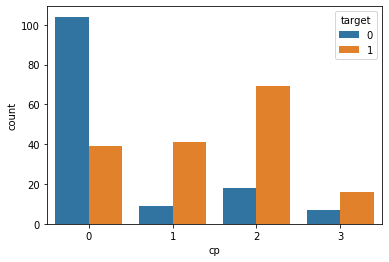

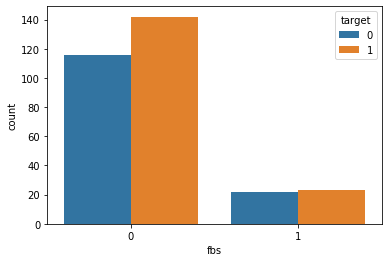

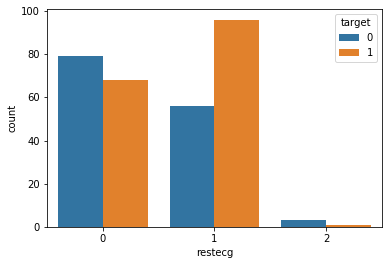

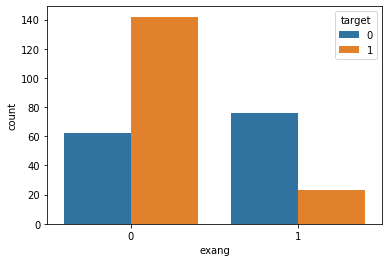

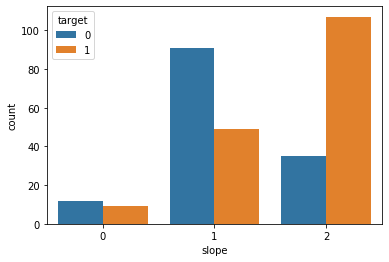

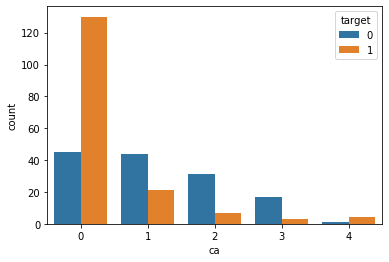

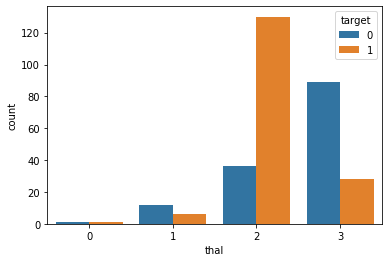

<Figure size 432x288 with 0 Axes>

In [12]:
for col in ['sex', 'cp','fbs', 'restecg','exang','slope', 'ca', 'thal']:
    sns.countplot(x=col,data=df,hue='target')
    plt.figure()


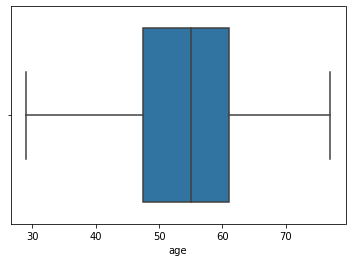

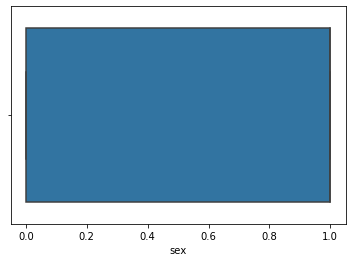

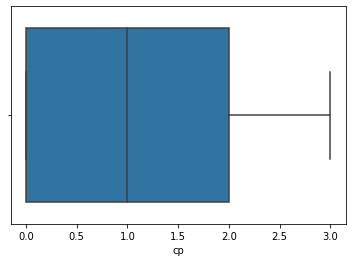

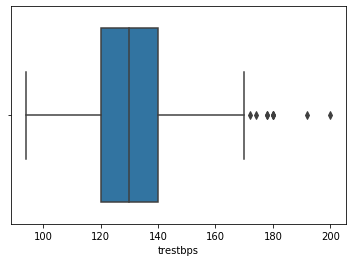

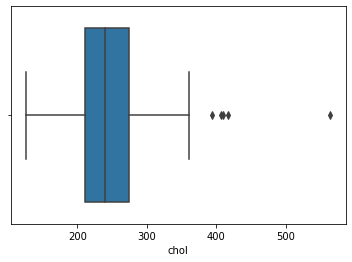

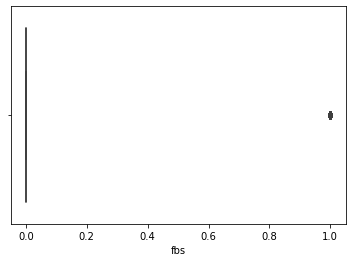

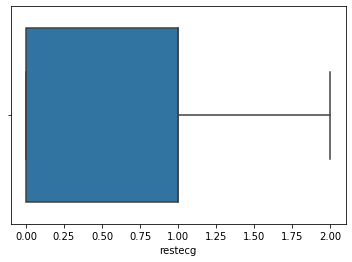

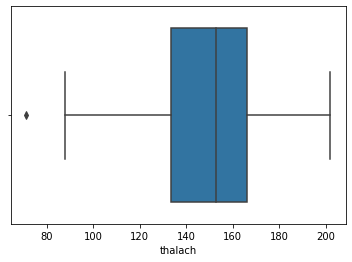

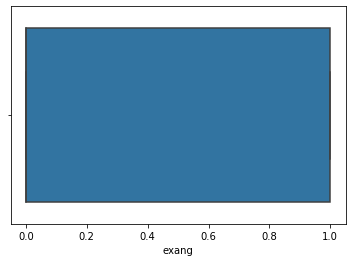

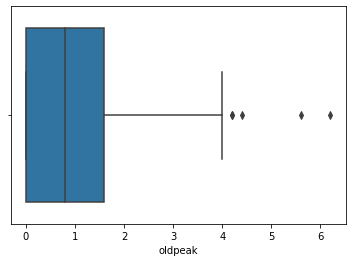

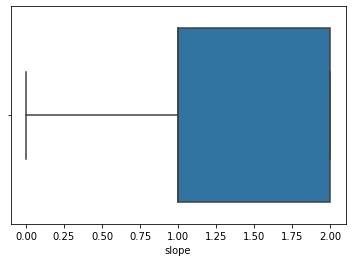

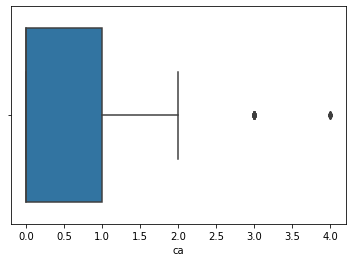

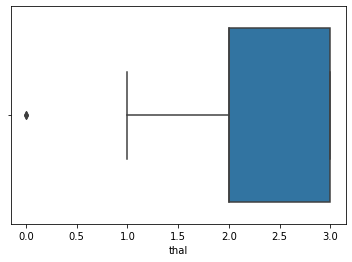

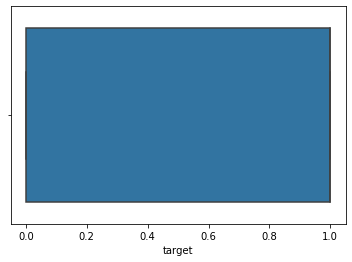

<Figure size 432x288 with 0 Axes>

In [13]:
for col in df.columns:
    sns.boxplot(x=col,data=df)
    plt.figure()

<Figure size 1080x432 with 0 Axes>

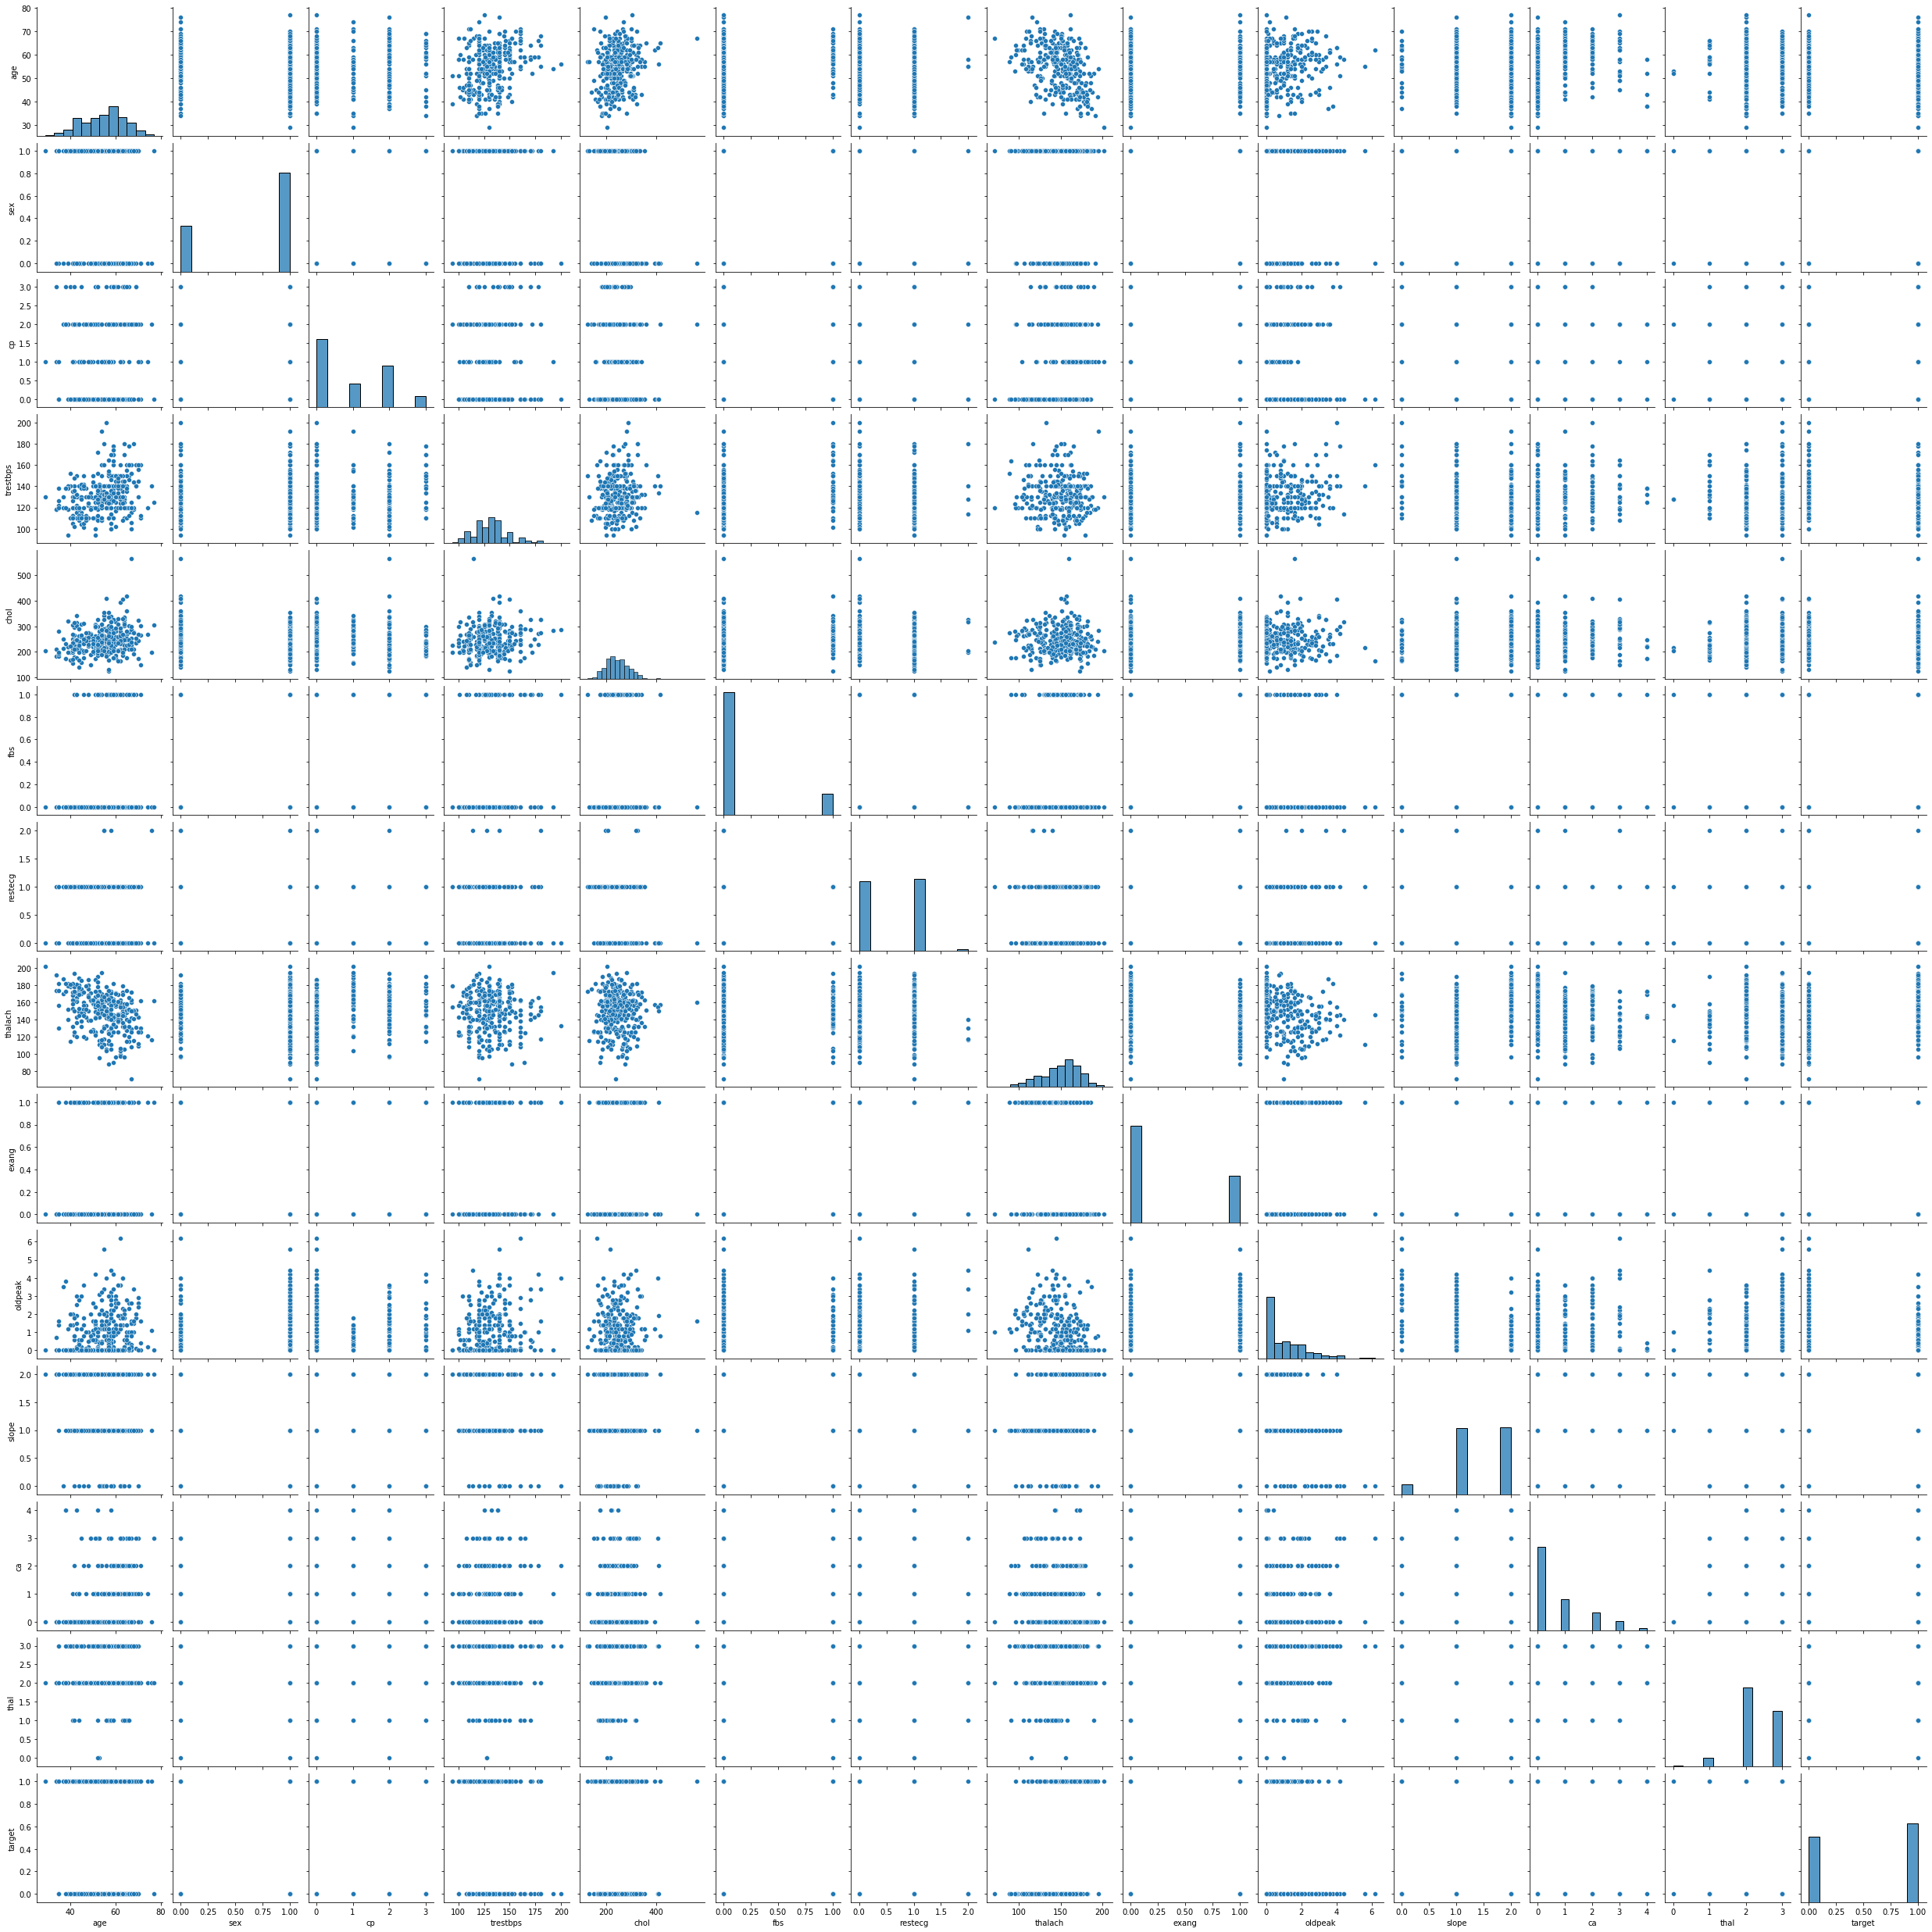

<Figure size 1080x432 with 0 Axes>

In [14]:
sns.pairplot(data=df)
plt.figure(figsize=(15,6))

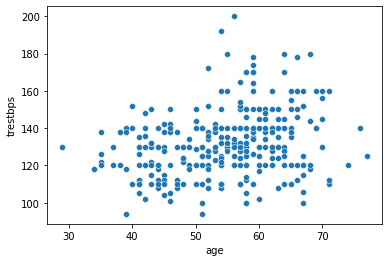

In [15]:
sns.scatterplot(x='age',y='trestbps',data=df)
# df.columns

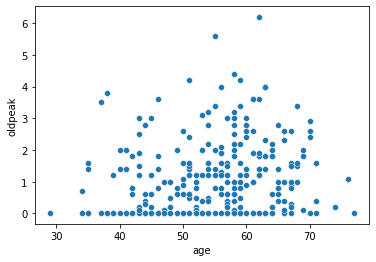

In [16]:
sns.scatterplot(x='age',y='oldpeak',data=df)

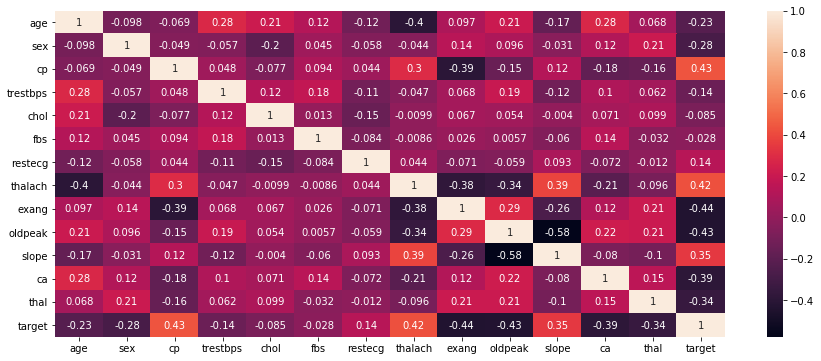

In [17]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True,cbar='light')


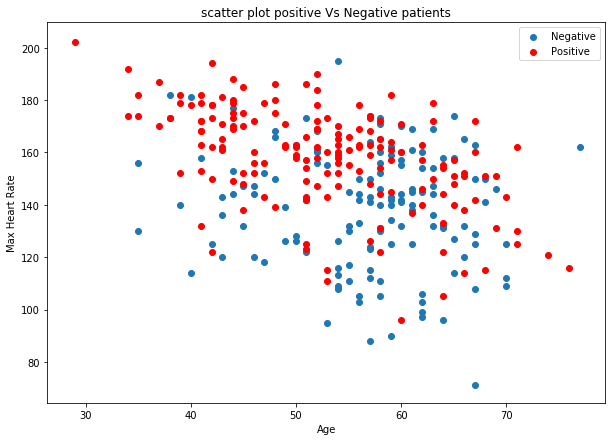

In [18]:
# scatter plot positive Vs Negative patients
plt.figure(figsize=(10,7))

plt.scatter(df.age[df.target==0],df.thalach[df.target==0])

plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='red')
plt.title("scatter plot positive Vs Negative patients")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(['Negative','Positive'])

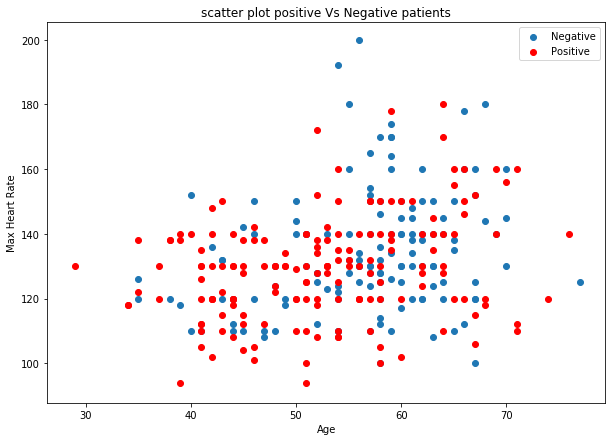

In [19]:
# scatter plot positive Vs Negative patients
plt.figure(figsize=(10,7))

plt.scatter(df.age[df.target==0],df.trestbps[df.target==0])

plt.scatter(df.age[df.target==1],df.trestbps[df.target==1],c='red')
plt.title("scatter plot positive Vs Negative patients")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(['Negative','Positive'])

In [20]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

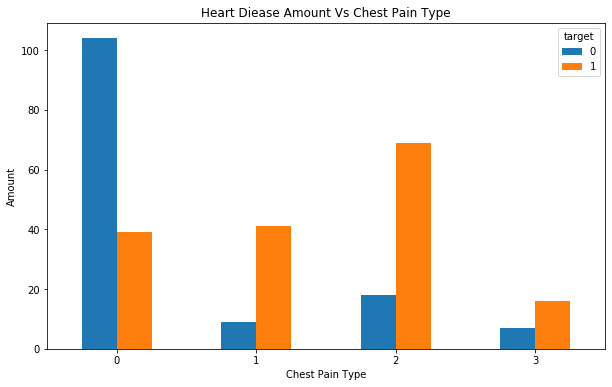

In [21]:
pd.crosstab(df['cp'],df['target']).plot(kind="bar",figsize=(10,6))
plt.title("Heart Diease Amount Vs Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.xticks(rotation=0)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop('target',axis=1)
y = df['target']

In [129]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.30,random_state=101)

In [130]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier



In [134]:
model_dt = DecisionTreeClassifier().fit(xtrain,ytrain)
model_rt = RandomForestClassifier().fit(xtrain,ytrain)

In [135]:
model_dt.score(xtest,ytest)

0.7912087912087912

In [136]:
model_rt.score(xtest,ytest)

0.8241758241758241

In [128]:
ypred = model_rt.predict(xtest)

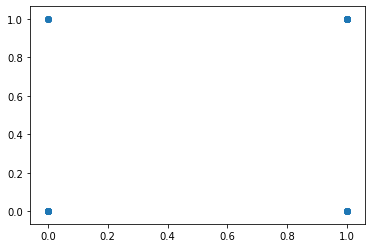

In [33]:
plt.scatter(ytest,ypred)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

In [35]:
model_log = LogisticRegression().fit(xtrain,ytrain)
model_knn = KNeighborsClassifier().fit(xtrain,ytrain)

In [36]:
model_log.score(xtest,ytest)
model_knn.score(xtest,ytest)

0.6447368421052632

In [122]:
model_dict = []

model_dict.append(("Logistic Regression",LogisticRegression()))
model_dict.append(('KNN', KNeighborsClassifier()))
model_dict.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
model_dict.append(('RandomForestClassifier', RandomForestClassifier()))

results,names=[],[]
scoring = 'accuracy'

for name,model in model_dict:
    kfold = model_selection.KFold(n_splits=10,random_state=7)
    cv_results = model_selection.cross_val_score(model,xtrain,ytrain,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.833004 (0.104168)
KNN: 0.590119 (0.120645)
DecisionTreeClassifier: 0.766403 (0.061999)
RandomForestClassifier: 0.779842 (0.058199)


In [38]:
# model_compare = pd.DataFrame(msg, index=["accuracy"])
# model_compare.T.plot.bar();

In [39]:
pd.DataFrame(model_rt.feature_importances_,index=X.columns,columns=['imp'])

,imp
age,0.087702
sex,0.029755
cp,0.111330
trestbps,0.094550
chol,0.071331
fbs,0.010948
restecg,0.014305
thalach,0.154890
exang,0.078059
oldpeak,0.092114


In [120]:
X2 = X.drop(['sex','fbs','restecg','exang','slope'],axis=1)
y2 = y.copy()

In [121]:
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(X2,y2,test_size=0.25,random_state=101)
model_rt2 = RandomForestClassifier().fit(xtrain2,ytrain2)
model_rt2.score(xtest2,ytest2)

0.8157894736842105

In [111]:
model_rt.score(xtest,ytest)

0.868421052631579

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
# Tune Random Forest Model
np.random.seed(42)
grid_2 = {"n_estimators": np.arange(10,100,10),
          "max_depth": [None,3,5,7,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2),
          "max_features": [0.5,1,"sqrt","auto"],
          }

model_rt_tune = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=grid_2,
                           cv=5,
                           n_iter=100,
                           verbose=True)
model_rt_tune.fit(xtrain,ytrain)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   25.8s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [52]:
model_rt_tune.best_params_

{'n_estimators': 70,
 'min_samples_split': 18,
 'min_samples_leaf': 17,
 'max_features': 'auto',
 'max_depth': 3}

In [53]:
final_score = model_rt_tune.score(xtest,ytest)
final_score

0.868421052631579

In [178]:
rf_model = RandomForestClassifier(n_estimators = 70,min_samples_split= 18,min_samples_leaf= 17,criterion='gini',max_features= 'auto',max_depth= 3,random_state=100).fit(xtrain,ytrain)
rf_model.score(xtest,ytest)*100

87.91208791208791

In [168]:
rf_model.score(xtest,ytest)

0.8791208791208791

In [179]:
final_model = rf_model

In [170]:
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=17, min_samples_split=18,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [180]:
pd.to_pickle(final_model,"PredictHeartDisease")

In [181]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')